# Library set up

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
os.listdir(os.getcwd())

['.git',
 '.ipynb_checkpoints',
 'Book2.csv',
 'Caffeine.csv',
 'EK.csv',
 'EK.xlsx',
 'final.csv',
 'lightgbm.csv',
 'Obesity.csv',
 'Obesity.xlsx',
 'occupation.csv',
 'occupation1.csv',
 'occupation2.csv',
 'pre_processed_report_version.csv',
 'questionnaire.csv',
 'README.md',
 'US Health Program (BMI Prediction model) - Hakkoma.ipynb']

In [3]:
data1 = pd.read_csv("Caffeine.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 8 columns):
Respondent ID          10175 non-null int64
Gender                 10175 non-null object
Age                    10175 non-null int64
Age group              10175 non-null object
Caffeine (mg)          8531 non-null float64
High blood pressure    6464 non-null object
Blood cholesterol      6464 non-null object
Arthritis              5769 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 636.0+ KB


In [4]:
data2 = pd.read_csv("EK.csv")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 10 columns):
Respondent ID                                                                                                         5025 non-null int64
Gender                                                                                                                5025 non-null object
Age in years of the participant at the time of screening. Individuals 80 and over are topcoded at 80 years of age.    5025 non-null object
Race                                                                                                                  5025 non-null object
Total number of people in the Household                                                                               5025 non-null object
Total household income (reported as a range value in dollars)                                                         5025 non-null object
HH reference person's education level                       

In [5]:
data3 = pd.read_csv("Obesity.csv")
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7091 entries, 0 to 7090
Data columns (total 7 columns):
Respondent ID    7091 non-null int64
BMI              7091 non-null object
Weight           7091 non-null object
Gender           7091 non-null object
Age 35 and 36    7091 non-null object
Energy (kcal)    7091 non-null object
Race             7091 non-null object
dtypes: int64(1), object(6)
memory usage: 387.9+ KB


In [6]:
data4 = pd.read_csv('Book2.csv')
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 11 columns):
Respondent ID          10175 non-null int64
Chest discomfort       3815 non-null object
High blood pressure    6464 non-null object
Diabetes               9769 non-null object
Trouble sleeping       6464 non-null object
Sleep disorder         6464 non-null object
Working hour 35        3345 non-null object
Working hour 40        3345 non-null object
Occupation             3443 non-null object
High aspirin usage     3815 non-null object
Depression             5396 non-null object
dtypes: int64(1), object(10)
memory usage: 874.5+ KB


In [7]:
#actual data load
final = pd.read_csv('final.csv')
final['Arthritis'] = final['Arthritis'].astype('bool')
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 12 columns):
Respondent ID              10175 non-null int64
Age                        10175 non-null int64
Caffeine (mg)              8531 non-null float64
Arthritis                  10175 non-null bool
Gender (Male)              10175 non-null bool
Race (white)               10175 non-null bool
BMI                        7091 non-null float64
Working hour 35            10175 non-null bool
Working hour 40            10175 non-null bool
Occupation (Government)    10175 non-null bool
Occupation (Self)          10175 non-null bool
Occupation (Private)       10175 non-null bool
dtypes: bool(8), float64(2), int64(2)
memory usage: 397.5 KB


In [8]:
#obesity
data_obesity = final.loc[final['BMI']>=0]
data_obesity.info()

#train and test set 80/20
data_train = data_obesity.loc[data_obesity['Respondent ID']<=81391]
data_test = data_obesity.loc[data_obesity['Respondent ID']>81391]
print(len(data_train))
print(len(data_test))
data_train
data_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 0 to 9812
Data columns (total 12 columns):
Respondent ID              7091 non-null int64
Age                        7091 non-null int64
Caffeine (mg)              7091 non-null float64
Arthritis                  7091 non-null bool
Gender (Male)              7091 non-null bool
Race (white)               7091 non-null bool
BMI                        7091 non-null float64
Working hour 35            7091 non-null bool
Working hour 40            7091 non-null bool
Occupation (Government)    7091 non-null bool
Occupation (Self)          7091 non-null bool
Occupation (Private)       7091 non-null bool
dtypes: bool(8), float64(2), int64(2)
memory usage: 332.4 KB
5672
1419


,Respondent ID,Age,Caffeine (mg),Arthritis,Gender (Male),Race (white),BMI,Working hour 35,Working hour 40,Occupation (Government),Occupation (Self),Occupation (Private)
7835,81392,11,0.0,True,False,False,39.7,False,False,False,False,False
7836,81393,16,4.0,True,False,False,26.5,False,False,False,False,False
7837,81394,10,83.0,True,False,False,40.7,False,False,False,False,False
7838,81395,23,0.0,True,True,False,32.4,True,False,False,False,True
7841,81398,2,3.0,True,False,True,28.9,False,False,False,False,False
7843,81400,2,130.0,True,True,False,30.5,False,False,False,False,False
7844,81401,16,0.0,True,False,False,21.6,False,False,False,False,False
7845,81402,11,2.0,True,True,False,0.0,False,False,False,False,False
7846,81403,5,5.0,True,True,False,19.0,False,False,False,False,False
7848,81405,10,0.0,True,True,False,14.0,False,False,False,False,False


In [9]:
#light gbm library
import lightgbm as lgb

#model factors
#target = BMI
#all_factors = ['Chest discomfort','High blood pressure','Diabetes','Trouble sleeping','Sleep disorder','Working hour 35','Working hour 40',
#              'Occupation','High aspirin usage','Depression','Total number of people in the Household', 'Total HH income', 'HH reference person education',
#               'HH reference person martial status', 'General health condition', 'Diabetes.1', 'Age', 'Caffeine (mg)', 'Blood cholesterol',
#               'Arthritis', 'Gender','Race', 'Weight', 'Energy (kcal)']

#significant factors
factors = ['Age', 'Caffeine (mg)', 'Gender (Male)', 'Race (white)', 'Working hour 35', 'Working hour 40','Occupation (Government)',
          'Occupation (Self)', 'Occupation (Private)']

In [10]:
#light gbm parameters
params = {'num_leaves': 50,
         'min_data_in_leaf': 50,
         'objective':'regression',
         'max_depth': 7,
         'learing_rate':0.02,
         'boosting': 'gbdt',
         'feature_fraction':0.7522,
         'bagging_freq':3,
         'bagging_fraction':0.7083,
         'bagging_seed': 11,
         'metric': 'rmse',
         'random_state':2019}



In [11]:
#train_data with lgb dataframe and forecast - over fitting model
train_data = lgb.Dataset(data_train[factors],label=data_train['BMI'])
num_rounds = 10000
model = lgb.train(params,train_data, num_rounds, valid_sets = [train_data], verbose_eval = 100, early_stopping_rounds = 200)
forecast = model.predict(data_test[factors])

Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 9.81726
[200]	training's rmse: 9.5789
[300]	training's rmse: 9.37194
[400]	training's rmse: 9.22223
[500]	training's rmse: 9.08159
[600]	training's rmse: 8.95482
[700]	training's rmse: 8.84657
[800]	training's rmse: 8.76694
[900]	training's rmse: 8.66697
[1000]	training's rmse: 8.58322
[1100]	training's rmse: 8.49941
[1200]	training's rmse: 8.41349
[1300]	training's rmse: 8.3396
[1400]	training's rmse: 8.26841
[1500]	training's rmse: 8.20904
[1600]	training's rmse: 8.15261
[1700]	training's rmse: 8.0991
[1800]	training's rmse: 8.04536
[1900]	training's rmse: 7.9935
[2000]	training's rmse: 7.94179
[2100]	training's rmse: 7.90202
[2200]	training's rmse: 7.84703
[2300]	training's rmse: 7.79717
[2400]	training's rmse: 7.75538
[2500]	training's rmse: 7.70697
[2600]	training's rmse: 7.66203
[2700]	training's rmse: 7.62338
[2800]	training's rmse: 7.5856
[2900]	training's rmse: 7.54788
[3000]	training's rmse:

In [12]:
forecast

array([21.39155999, 29.54841388, 25.04533276, ..., 13.93438179,
       36.41104104, 18.01160576])

In [13]:
data_check = data_test[['Respondent ID','BMI']]
data_check['BMI_predict']=forecast
data_check['result'] = data_check['BMI']-data_check['BMI_predict']
print(data_check['result'].mean())
data_check

0.903954318462653


,Respondent ID,BMI,BMI_predict,result
7835,81392,39.7,21.391560,18.308440
7836,81393,26.5,29.548414,-3.048414
7837,81394,40.7,25.045333,15.654667
7838,81395,32.4,28.316961,4.083039
7841,81398,28.9,8.496156,20.403844
7843,81400,30.5,23.381899,7.118101
7844,81401,21.6,22.293623,-0.693623
7845,81402,0.0,28.955838,-28.955838
7846,81403,19.0,16.738086,2.261914
7848,81405,14.0,18.056327,-4.056327


In [14]:
#light gbm parameters
params1 = {'num_leaves': 50,
         'min_data_in_leaf': 30,
         'objective':'regression',
         'max_depth': 7,
         'learing_rate':0.02,
         'boosting': 'gbdt',
         'feature_fraction':0.8,
         'bagging_freq':3,
         'bagging_fraction':0.8,
         'bagging_seed': 11,
         'metric': 'rmse',
         'random_state':2019}

#train_data with lgb data frame and forecast - accuracy model
train_data = lgb.Dataset(data_train[factors],label=data_train['BMI'])
num_rounds = 2000
model1 = lgb.train(params1,train_data, num_rounds, valid_sets = [train_data], verbose_eval = 100, early_stopping_rounds = 200)
forecast1 = model1.predict(data_test[factors])

Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 9.58838
[200]	training's rmse: 9.22409
[300]	training's rmse: 8.94272
[400]	training's rmse: 8.70166
[500]	training's rmse: 8.49105
[600]	training's rmse: 8.32929
[700]	training's rmse: 8.18022
[800]	training's rmse: 8.0456
[900]	training's rmse: 7.90924
[1000]	training's rmse: 7.78737
[1100]	training's rmse: 7.6853
[1200]	training's rmse: 7.59217
[1300]	training's rmse: 7.48597
[1400]	training's rmse: 7.38752
[1500]	training's rmse: 7.30352
[1600]	training's rmse: 7.22151
[1700]	training's rmse: 7.14749
[1800]	training's rmse: 7.07504
[1900]	training's rmse: 7.00862
[2000]	training's rmse: 6.94295
Did not meet early stopping. Best iteration is:
[2000]	training's rmse: 6.94295


In [15]:
#forecast value into data frame
data_check1= data_test[['Respondent ID','BMI']]
data_check1['BMI_predict']=forecast1
data_check1['result'] = data_check1['BMI']-data_check1['BMI_predict']

#ME of result
print(data_check1['result'].mean())
#data frame of result
data_check1

0.9505511837396029


,Respondent ID,BMI,BMI_predict,result
7835,81392,39.7,22.575982,17.124018
7836,81393,26.5,25.806904,0.693096
7837,81394,40.7,27.077888,13.622112
7838,81395,32.4,29.787480,2.612520
7841,81398,28.9,10.491303,18.408697
7843,81400,30.5,23.511391,6.988609
7844,81401,21.6,23.160274,-1.560274
7845,81402,0.0,26.399071,-26.399071
7846,81403,19.0,19.868785,-0.868785
7848,81405,14.0,18.634708,-4.634708


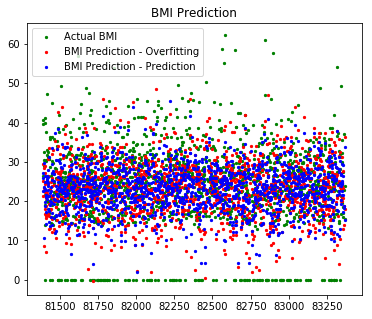

In [16]:
#result of model
plt.figure(figsize=(6,5))

plt.scatter(data_check['Respondent ID'],data_check['BMI'], s=5,color = 'g')
plt.scatter(data_check['Respondent ID'],data_check['BMI_predict'],s=5, color = 'r')
plt.scatter(data_check['Respondent ID'],data_check1['BMI_predict'], s=5, color = 'b')
plt.title('BMI Prediction')
plt.legend(['Actual BMI','BMI Prediction - Overfitting', 'BMI Prediction - Prediction'])

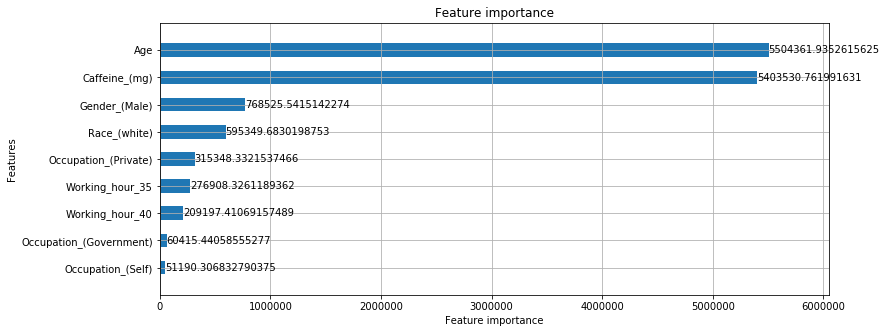

In [17]:
lgb.plot_importance(model, height=0.5, max_num_features=100, ignore_zero = False, figsize = (12,5), importance_type ='gain')

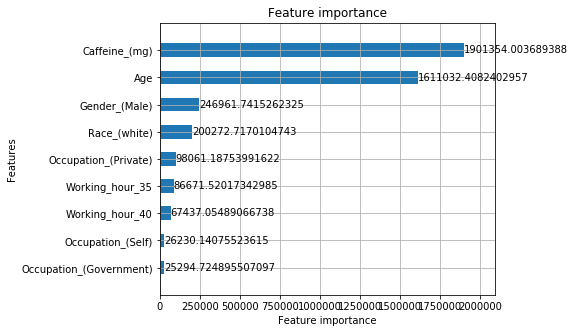

In [18]:
lgb.plot_importance(model1, height=0.5, max_num_features=100, ignore_zero = False, figsize = (6,5), importance_type ='gain')